In [1]:
import numpy as np
import pandas as pd
import random
%matplotlib inline

In [2]:
# Data Generation
# Warning! Boilerplate code
n = 100
x = np.arange(n)
y_stationary = np.random.normal(0, 1, n)

y_nonstationary = [random.random() + (x * .01) for x in range(100)]

df = pd.DataFrame({
    "Stationary": y_stationary,
    "Nonstationary": y_nonstationary
})

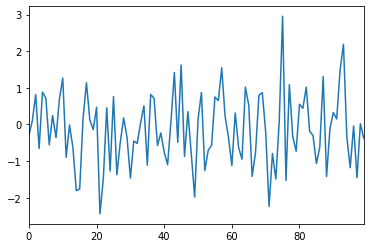

In [3]:
df.Stationary.plot()

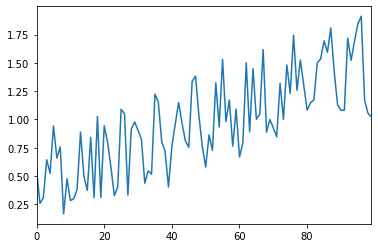

In [4]:
df.Nonstationary.plot()

In [5]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(df.Stationary)

(-6.834450303211603,
 1.8578604506797964e-09,
 3,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 249.92235213771545)

In [6]:
adfuller(df.Nonstationary)

(-0.3455852954930058,
 0.9187953585094397,
 11,
 88,
 {'1%': -3.506944401824286,
  '5%': -2.894989819214876,
  '10%': -2.584614550619835},
 25.475293017973314)

# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [7]:
# Convert to stationary data by taking the `pct_change` of the non-stationary data.
df['Returns'] = df.Nonstationary.pct_change()

In [8]:
# Drop the NaNs created by the pct_change function
df = df.dropna()

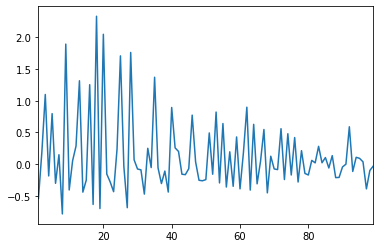

In [9]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df.Returns.plot()

### Technique 2: Applying a Diff

In [10]:
# Subtract the upward trend for the non-stationary data using the `diff()` function
df['Diff'] = df.Nonstationary.diff()

In [11]:
# Drop the NaNs created from the diff function
df = df.dropna()

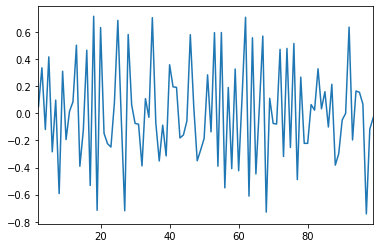

In [12]:
# Plot the 
df.Diff.plot()